In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("seaborn")

In [2]:
year = pd.DataFrame()
for i in range(12):
    theMonth = i+1
    if(theMonth < 10):
        theMonth = "0"+str(theMonth)
    else:
        theMonth = str(theMonth)
    month = pd.read_csv("marginal_emission/SGIP_CAISO_SDGE/SGIP_CAISO_SDGE_2017-{}_ALL_MOER_VERSIONS.csv".format(theMonth),parse_dates=['timestamp'])
    year = pd.concat([year, month], axis=0)

In [3]:
year

,timestamp,MOER version 2.0,MOER version 1.0
0,2017-01-01 00:00:00+00:00,0.381702,0.282234
1,2017-01-01 00:05:00+00:00,0.366871,0.270488
2,2017-01-01 00:10:00+00:00,0.358839,0.264128
3,2017-01-01 00:15:00+00:00,0.370315,0.273216
4,2017-01-01 00:20:00+00:00,0.381917,0.282404
...,...,...,...
8923,2017-12-31 23:35:00+00:00,0.301137,0.213449
8924,2017-12-31 23:40:00+00:00,0.346159,0.248539
8925,2017-12-31 23:45:00+00:00,0.315708,0.224806
8926,2017-12-31 23:50:00+00:00,0.381079,0.275754


In [4]:
print(month.dtypes)

timestamp           datetime64[ns, UTC]
MOER version 2.0                float64
MOER version 1.0                float64
dtype: object


<AxesSubplot:xlabel='timestamp'>

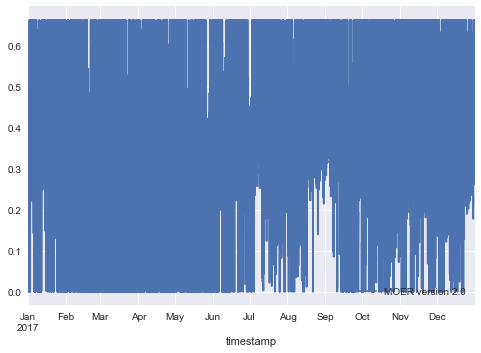

In [5]:
year.plot(x="timestamp", y="MOER version 2.0")

In [6]:
print(year[0:1])

                  timestamp  MOER version 2.0  MOER version 1.0
0 2017-01-01 00:00:00+00:00          0.381702          0.282234


In [7]:
# Create Heatmap
time = 12*24
day = 365
matrix = np.zeros(day*time,dtype=float)

MOERV2 = 1

plt.figure(figsize=(time,day))

for i in range (day):
    for j in range (time):
        MOER = year.iloc[int(i*time+j),MOERV2]
        #print(i*time+j)
        #print(MOER)
#         #print(year[i*time+j:i*time+j+1]['MOER version 2.0'].astype(float))
#         #MOER = year[i*time+j:i*time+j+1]['MOER version 2.0'].astype(float)
#         MOER = year[i*time+j:i*time+j+1]['MOER version 2.0']
#         MOER = str(MOER)[5:13]
#         print(MOER)
#         if(MOER=='0.0'):
#             MOER = 0
#         MOER = float(MOER)
        matrix[i*time+j] = MOER

<Figure size 20736x26280 with 0 Axes>

In [8]:
matrix = matrix.reshape(time,day)
# print(matrix)

In [9]:
theIndex = np.zeros(time,dtype=object)
for i in range(time):
    #print(str(int(i/60)), end ="")
    #print(str((i*5)%60), end="")
    minute = (i*5)%60
    if minute < 10:
        minute = "0"+str(minute)
    hour = int(i/12)
    #print(hour)
    if hour < 10:
        hour = "0"+str(hour)
    
    hour = str(hour)
    minute = str(minute)
    
    timeStr = hour+":"+minute
    #print(timeStr)
    theIndex[i] = timeStr
    #print(theIndex[i])
    #print()

theColumn = np.zeros(day,dtype=int)
for i in range(day):
    theColumn[i] = i

theColumn = theColumn.tolist()
theIndex = theIndex.tolist()
print(theIndex)
print(theColumn)

['00:00', '00:05', '00:10', '00:15', '00:20', '00:25', '00:30', '00:35', '00:40', '00:45', '00:50', '00:55', '01:00', '01:05', '01:10', '01:15', '01:20', '01:25', '01:30', '01:35', '01:40', '01:45', '01:50', '01:55', '02:00', '02:05', '02:10', '02:15', '02:20', '02:25', '02:30', '02:35', '02:40', '02:45', '02:50', '02:55', '03:00', '03:05', '03:10', '03:15', '03:20', '03:25', '03:30', '03:35', '03:40', '03:45', '03:50', '03:55', '04:00', '04:05', '04:10', '04:15', '04:20', '04:25', '04:30', '04:35', '04:40', '04:45', '04:50', '04:55', '05:00', '05:05', '05:10', '05:15', '05:20', '05:25', '05:30', '05:35', '05:40', '05:45', '05:50', '05:55', '06:00', '06:05', '06:10', '06:15', '06:20', '06:25', '06:30', '06:35', '06:40', '06:45', '06:50', '06:55', '07:00', '07:05', '07:10', '07:15', '07:20', '07:25', '07:30', '07:35', '07:40', '07:45', '07:50', '07:55', '08:00', '08:05', '08:10', '08:15', '08:20', '08:25', '08:30', '08:35', '08:40', '08:45', '08:50', '08:55', '09:00', '09:05', '09:10', 

In [11]:
matrix = pd.DataFrame(matrix, columns=theColumn,index=theIndex)
matrix

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
00:00,0.381702,0.366871,0.358839,0.370315,0.381917,0.393673,0.364648,0.377072,0.417288,0.437729,...,0.302604,0.299400,0.299251,0.281912,0.263757,0.288486,0.285148,0.284786,0.289908,0.284603
00:05,0.293578,0.294428,0.309336,0.305374,0.306549,0.294411,0.297427,0.314317,0.323329,0.326971,...,0.222090,0.257501,0.243675,0.235663,0.238207,0.240903,0.267991,0.262849,0.306555,0.277809
00:10,0.272842,0.319224,0.285217,0.307791,0.312589,0.310845,0.310845,0.294640,0.273116,0.279571,...,0.415279,0.456908,0.465616,0.484708,0.390338,0.386827,0.387010,0.381840,0.379275,0.427327
00:15,0.418998,0.422616,0.343552,0.521395,0.419274,0.429189,0.537222,0.545811,0.558887,0.546892,...,0.396506,0.416534,0.380392,0.409431,0.417417,0.416651,0.438785,0.462814,0.457086,0.517018
00:20,0.609702,0.636092,0.636220,0.636092,0.646186,0.637049,0.454669,0.447510,0.439362,0.426001,...,0.409273,0.437725,0.409401,0.405589,0.405115,0.399729,0.385010,0.359377,0.356172,0.352469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:35,0.250835,0.439175,0.404847,0.594726,0.512055,0.451019,0.453092,0.389742,0.441464,0.608500,...,0.233909,0.236116,0.232583,0.267186,0.223257,0.214969,0.210200,0.203149,0.208717,0.202556
23:40,0.213144,0.214646,0.270985,0.272502,0.270313,0.271831,0.273530,0.294127,0.215633,0.217339,...,0.663750,0.566824,0.492806,0.633376,0.439572,0.487783,0.498190,0.443495,0.450393,0.409711
23:45,0.391935,0.389585,0.389585,0.653897,0.663750,0.663750,0.663750,0.663750,0.663750,0.652926,...,0.335086,0.332920,0.329506,0.326100,0.326100,0.325861,0.325861,0.323773,0.326807,0.326807
23:50,0.326807,0.326207,0.326207,0.326207,0.325694,0.325694,0.325694,0.326830,0.326830,0.326830,...,0.240025,0.238004,0.251323,0.255378,0.262892,0.255378,0.262765,0.255505,0.249302,0.244654


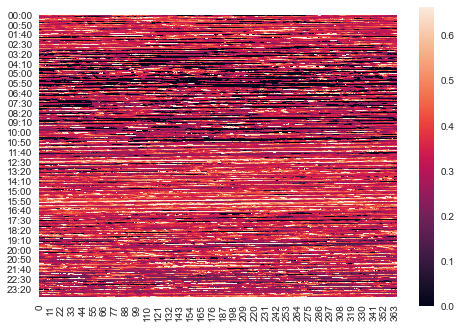

In [17]:
# month.plot(x="timestamp", y=["MOER version 2.0", "MOER version 1.0"])
heat_map = sns.heatmap(matrix,square=True)

In [ ]:
# Analyze Different Season
heat_map = sns.heatmap(matrix,square=True)